<a href="https://colab.research.google.com/github/RudreshKale/Sales-Prediction-using-Python/blob/main/Sales_Prediction_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics



In [ ]:
# Reading the file 
df= pd.read_csv("Advertising.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


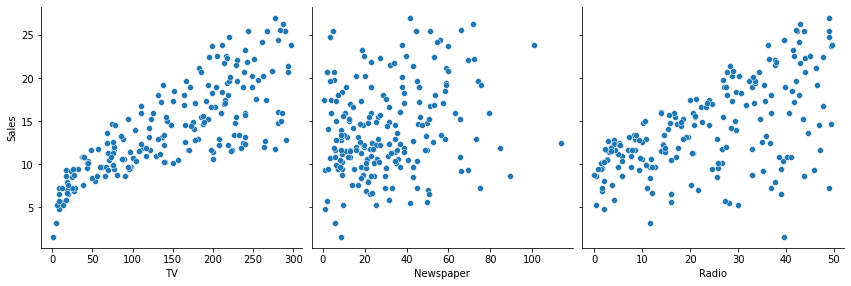

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()     

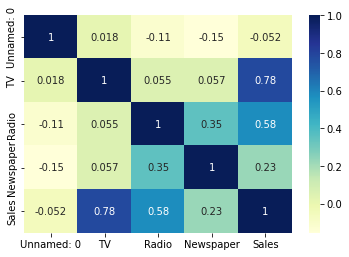

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()    

In [ ]:
#  Model 
# Seprating the data
x=df.drop(columns='Sales')
y=df['Sales']

In [ ]:
# train test split the data
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model_LR=LinearRegression()
model_LR.fit(X_train,y_train)

LinearRegression()

R2 score and preditct model for train

In [ ]:
train_data_pred= model_LR.predict(X_train)
error_score=metrics.r2_score(y_train,train_data_pred)
print("R2_score :",error_score)

R2_score : 0.9152614531156523


Visualize the train data

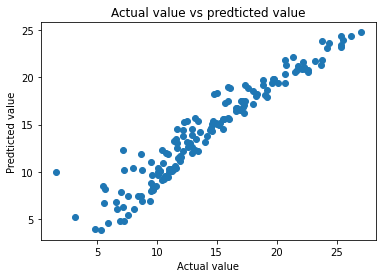

In [112]:
# Visualize the train data
plt.scatter(y_train,train_data_pred)
plt.xlabel("Actual value")
plt.ylabel("Predticted value")
plt.title("Actual value vs predticted value")
plt.show()

R2 score and preditct model for test

In [ ]:
test_data_pred= model_LR.predict(X_test)
error_score=metrics.r2_score(y_test,test_data_pred)
print("R2_score :",error_score)

R2_score : 0.7570326409482371


Mean square error

In [ ]:
# Mean square error
np.sqrt(mean_squared_error(y_test, test_data_pred))

2.124492757933321

Visualize the train data


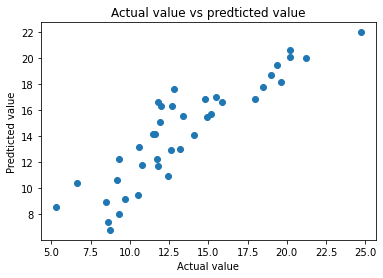

In [113]:
# Visualize the test data
plt.scatter(y_test,test_data_pred)
plt.xlabel("Actual value")
plt.ylabel("Predticted value")
plt.title("Actual value vs predticted value")
plt.show()


Lasso model


In [ ]:
#  lasso 
model_LA=Lasso()
model_LA.fit(X_train,y_train)

Lasso()

Train model predtict And R2 Score

In [ ]:
# Train model predtict And R2 Score
train_data_pred2= model_LA.predict(X_train)
error_score=metrics.r2_score(y_train,train_data_pred2)
print("R2_score :",error_score)

R2_score : 0.915082777175285


Visualize the train data

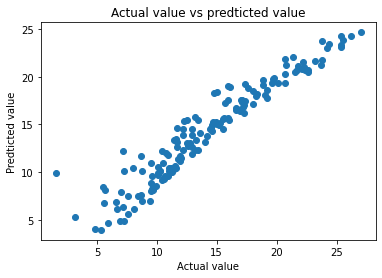

In [114]:
# Visualize the train data
plt.scatter(y_train,train_data_pred2)
plt.xlabel("Actual value")
plt.ylabel("Predticted value")
plt.title("Actual value vs predticted value")
plt.show()

Test model predtict And R2 Score

In [ ]:
# Test model predtict And R2 Score
test_data_pred2= model_LA.predict(X_test)
error_score=metrics.r2_score(y_test,test_data_pred2)
print("R2_score :",error_score)

R2_score : 0.7517490715136789


 Mean sqaured error for Lasso

In [ ]:
# Mean sqaured error for Lasso 
np.sqrt(mean_squared_error(y_test, test_data_pred2))

2.147468139207522

Visualize the test data

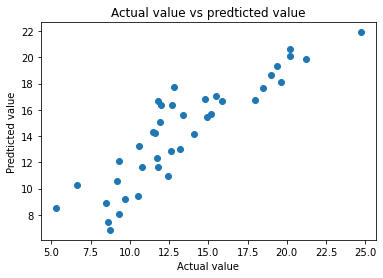

In [115]:
# Visualize the test data
plt.scatter(y_test,test_data_pred2)
plt.xlabel("Actual value")
plt.ylabel("Predticted value")
plt.title("Actual value vs predticted value")
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


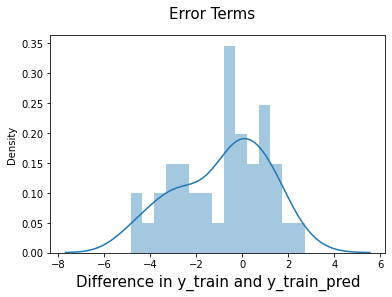

In [ ]:
fig = plt.figure()
res=(y_test-test_data_pred)
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()